In [55]:
import pandas as pd

fed_files = ["/Users/duckvan/Desktop/IOT/Dự đoán giá/CPIAUCSL.csv", "/Users/duckvan/Desktop/IOT/Dự đoán giá/MORTGAGE30US.csv", "/Users/duckvan/Desktop/IOT/Dự đoán giá/RRVRUSQ156N.csv"]

dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in fed_files]

In [56]:
dfs[0]

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2022-03-01,287.708
2022-04-01,288.663
2022-05-01,291.474


In [57]:
fed_data = pd.concat(dfs, axis=1)


In [58]:
fed_data


,CPIAUCSL,MORTGAGE30US,RRVRUSQ156N
DATE,,,
1947-01-01,21.48,NaN,NaN
1947-02-01,21.62,NaN,NaN
1947-03-01,22.00,NaN,NaN
1947-04-01,22.00,NaN,NaN
1947-05-01,21.95,NaN,NaN
...,...,...,...
2022-07-14,NaN,5.51,NaN
2022-07-21,NaN,5.54,NaN
2022-07-28,NaN,5.30,NaN


In [59]:
fed_data = fed_data.ffill().dropna()


In [60]:
fed_data


,CPIAUCSL,MORTGAGE30US,RRVRUSQ156N
DATE,,,
1971-04-02,40.100,7.33,5.3
1971-04-09,40.100,7.31,5.3
1971-04-16,40.100,7.31,5.3
1971-04-23,40.100,7.31,5.3
1971-04-30,40.100,7.29,5.3
...,...,...,...
2022-07-14,295.271,5.51,5.6
2022-07-21,295.271,5.54,5.6
2022-07-28,295.271,5.30,5.6


In [61]:
zillow_files = ["/Users/duckvan/Desktop/IOT/Dự đoán giá/Metro_median_sale_price_uc_sfrcondo_week.csv", "/Users/duckvan/Desktop/IOT/Dự đoán giá/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]

dfs = [pd.read_csv(f) for f in zillow_files]

In [62]:
dfs[0]


,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,394528,90,"Daytona Beach, FL",Msa,FL,NaN,170000.0,182400.0,170000.0,170000.0,...,340500.0,345000.0,327700.0,345000.0,350000.0,343250.0,359900.0,352000.0,336000.0,342990.0
80,394531,91,"Des Moines, IA",Msa,IA,138000.0,160000.0,150000.0,151750.0,154500.0,...,270000.0,285250.0,295000.0,273450.0,301000.0,290000.0,300900.0,281900.0,289250.0,280000.0
81,395006,100,"Provo, UT",Msa,UT,NaN,206000.0,215500.0,210000.0,210000.0,...,527000.0,540000.0,535000.0,552500.0,543750.0,571000.0,530300.0,569900.0,539950.0,572500.0
82,394549,104,"Durham, NC",Msa,NC,210000.0,170000.0,170500.0,197500.0,180000.0,...,456000.0,450000.0,428500.0,480000.0,465000.0,440000.0,450250.0,416000.0,465000.0,435250.0


In [63]:
dfs[1]


,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,102001,0,United States,Country,NaN,108641.264685,108472.728880,108532.280074,108739.077466,108986.621607,...,318648.557319,322227.276010,327377.250887,332206.790140,338002.747686,344042.433111,350515.841789,354717.722904,357473.327397,357107.271636
1,394913,1,"New York, NY",Msa,NY,188550.306900,186833.460516,186448.089063,186132.003064,186023.979536,...,573099.183713,575351.020713,577891.698212,582902.117225,588521.056859,598696.268370,607668.479848,615457.379763,619722.310507,621307.894902
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,186683.041088,186015.165187,185723.797105,185700.155256,185569.298179,...,854076.999683,862487.347366,874894.413168,888106.123973,902359.871460,931407.638755,950811.533011,955845.190020,933648.296046,929753.425908
3,394463,3,"Chicago, IL",Msa,IL,147341.931571,147341.152880,146420.379418,147841.918776,148371.389735,...,288899.103704,290304.887853,291998.702189,294814.368208,298667.824107,304076.779527,308802.105551,314032.378286,315084.424557,314178.550606
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,113283.512989,113199.113561,113519.423633,114048.064719,114287.444295,...,338187.525418,344409.906452,351186.037787,359878.893639,370452.369604,376522.090399,391696.585402,399613.324087,401254.775442,396903.773679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,92899.038250,92999.754549,97296.415265,98217.639150,100010.331287,101084.700150,101376.966610,103321.694906,105794.451088,106244.149398
909,753874,930,"Craig, CO",Msa,CO,66532.401041,66795.083062,67178.691523,67680.532389,67149.040671,...,244845.354879,245187.643589,253767.119261,254926.311559,253700.139970,255387.314731,254937.506748,256166.409003,266655.039121,268370.634013
910,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,169404.973627,171295.739580,178176.871040,178929.217811,179113.938659,181811.015503,184752.025925,187573.847282,192967.342193,193366.794326
911,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,80043.974772,80196.507293,NaN,86966.994296,88535.643138,88556.495891,88921.719463,89261.931509,92129.408692,93197.602418


In [64]:
dfs = [pd.DataFrame(df.iloc[0,5:]) for df in dfs]
for df in dfs:
    df.index = pd.to_datetime(df.index)
    df["month"] = df.index.to_period("M")

In [65]:
dfs[0]

,0,month
2008-02-02,190000.0,2008-02
2008-02-09,190000.0,2008-02
2008-02-16,193000.0,2008-02
2008-02-23,189900.0,2008-02
2008-03-01,194900.0,2008-03
...,...,...
2022-06-11,370000.0,2022-06
2022-06-18,375000.0,2022-06
2022-06-25,370000.0,2022-06
2022-07-02,370000.0,2022-07


In [66]:
price_data = dfs[0].merge(dfs[1], on="month")

In [67]:
price_data.index = dfs[0].index

In [68]:
price_data

,0_x,month,0_y
2008-02-02,190000.0,2008-02,206885.853266
2008-02-09,190000.0,2008-02,206885.853266
2008-02-16,193000.0,2008-02,206885.853266
2008-02-23,189900.0,2008-02,206885.853266
2008-03-01,194900.0,2008-03,205459.521952
...,...,...,...
2022-06-11,370000.0,2022-06,357473.327397
2022-06-18,375000.0,2022-06,357473.327397
2022-06-25,370000.0,2022-06,357473.327397
2022-07-02,370000.0,2022-07,357107.271636


In [69]:
del price_data["month"]
price_data.columns = ["price", "value"]

In [70]:
price_data

,price,value
2008-02-02,190000.0,206885.853266
2008-02-09,190000.0,206885.853266
2008-02-16,193000.0,206885.853266
2008-02-23,189900.0,206885.853266
2008-03-01,194900.0,205459.521952
...,...,...
2022-06-11,370000.0,357473.327397
2022-06-18,375000.0,357473.327397
2022-06-25,370000.0,357473.327397
2022-07-02,370000.0,357107.271636


In [71]:
from datetime import timedelta

fed_data.index = fed_data.index + timedelta(days=2)

In [72]:
fed_data.tail(10)

,CPIAUCSL,MORTGAGE30US,RRVRUSQ156N
DATE,,,
2022-06-18,295.328,5.78,5.6
2022-06-25,295.328,5.81,5.6
2022-07-02,295.328,5.70,5.6
2022-07-03,295.271,5.70,5.6
2022-07-09,295.271,5.30,5.6
2022-07-16,295.271,5.51,5.6
2022-07-23,295.271,5.54,5.6
2022-07-30,295.271,5.30,5.6
2022-08-06,295.271,4.99,5.6


In [73]:
price_data = fed_data.merge(price_data, left_index=True, right_index=True)


In [74]:
price_data


,CPIAUCSL,MORTGAGE30US,RRVRUSQ156N,price,value
2008-02-02,212.174,5.68,10.1,190000.0,206885.853266
2008-02-09,212.687,5.67,10.1,190000.0,206885.853266
2008-02-16,212.687,5.72,10.1,193000.0,206885.853266
2008-02-23,212.687,6.04,10.1,189900.0,206885.853266
2008-03-01,212.687,6.24,10.1,194900.0,205459.521952
...,...,...,...,...,...
2022-06-11,295.328,5.23,5.6,370000.0,357473.327397
2022-06-18,295.328,5.78,5.6,375000.0,357473.327397
2022-06-25,295.328,5.81,5.6,370000.0,357473.327397
2022-07-02,295.328,5.70,5.6,370000.0,357107.271636


In [75]:
price_data.columns = ["interest", "vacancy", "cpi", "price", "value"]


In [76]:
price_data


,interest,vacancy,cpi,price,value
2008-02-02,212.174,5.68,10.1,190000.0,206885.853266
2008-02-09,212.687,5.67,10.1,190000.0,206885.853266
2008-02-16,212.687,5.72,10.1,193000.0,206885.853266
2008-02-23,212.687,6.04,10.1,189900.0,206885.853266
2008-03-01,212.687,6.24,10.1,194900.0,205459.521952
...,...,...,...,...,...
2022-06-11,295.328,5.23,5.6,370000.0,357473.327397
2022-06-18,295.328,5.78,5.6,375000.0,357473.327397
2022-06-25,295.328,5.81,5.6,370000.0,357473.327397
2022-07-02,295.328,5.70,5.6,370000.0,357107.271636


In [77]:

price_data["adj_price"] = price_data["price"] / price_data["cpi"] * 100
price_data["adj_value"] = price_data["value"] / price_data["cpi"] * 100

<Axes: >

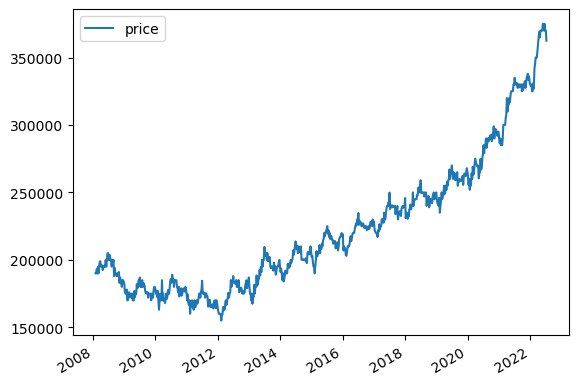

In [78]:
price_data.plot.line(y="price", use_index=True)

<Axes: >

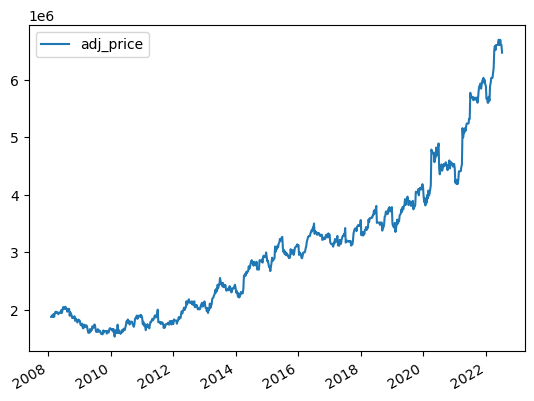

In [79]:
price_data.plot.line(y="adj_price", use_index=True)


In [80]:
price_data["next_quarter"] = price_data["adj_price"].shift(-13)


In [81]:
price_data.dropna(inplace=True)


In [82]:
price_data


,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter
2008-02-02,212.174,5.68,10.1,190000.0,206885.853266,1881188.118812,2048374.78481,1950000.0
2008-02-09,212.687,5.67,10.1,190000.0,206885.853266,1881188.118812,2048374.78481,1949000.0
2008-02-16,212.687,5.72,10.1,193000.0,206885.853266,1910891.089109,2048374.78481,1958710.0
2008-02-23,212.687,6.04,10.1,189900.0,206885.853266,1880198.019802,2048374.78481,1950000.0
2008-03-01,212.687,6.24,10.1,194900.0,205459.521952,1929702.970297,2034252.692591,2000000.0
...,...,...,...,...,...,...,...,...
2022-03-12,287.708,3.85,5.8,350000.0,344042.433111,6034482.758621,5931766.088125,6607142.857143
2022-03-19,287.708,4.16,5.8,350000.0,344042.433111,6034482.758621,5931766.088125,6696428.571429
2022-03-26,287.708,4.42,5.8,355000.0,344042.433111,6120689.655172,5931766.088125,6607142.857143
2022-04-02,287.708,4.67,5.8,360000.0,350515.841789,6206896.551724,6043376.582569,6607142.857143


In [83]:
price_data["change"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)


In [84]:
price_data


,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change
2008-02-02,212.174,5.68,10.1,190000.0,206885.853266,1881188.118812,2048374.78481,1950000.0,1
2008-02-09,212.687,5.67,10.1,190000.0,206885.853266,1881188.118812,2048374.78481,1949000.0,1
2008-02-16,212.687,5.72,10.1,193000.0,206885.853266,1910891.089109,2048374.78481,1958710.0,1
2008-02-23,212.687,6.04,10.1,189900.0,206885.853266,1880198.019802,2048374.78481,1950000.0,1
2008-03-01,212.687,6.24,10.1,194900.0,205459.521952,1929702.970297,2034252.692591,2000000.0,1
...,...,...,...,...,...,...,...,...,...
2022-03-12,287.708,3.85,5.8,350000.0,344042.433111,6034482.758621,5931766.088125,6607142.857143,1
2022-03-19,287.708,4.16,5.8,350000.0,344042.433111,6034482.758621,5931766.088125,6696428.571429,1
2022-03-26,287.708,4.42,5.8,355000.0,344042.433111,6120689.655172,5931766.088125,6607142.857143,1
2022-04-02,287.708,4.67,5.8,360000.0,350515.841789,6206896.551724,6043376.582569,6607142.857143,1


In [85]:
price_data["change"].value_counts()


change
1    407
0    315
Name: count, dtype: int64

In [86]:
predictors = ["interest", "vacancy", "adj_price", "adj_value"]
target = "change"

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

START = 260
STEP = 52

def predict(train, test, predictors, target):
    lr = LogisticRegression(random_state=1)
    lr.fit(train[predictors], train[target])
    preds = lr.predict(test[predictors])
    return preds

def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i+STEP)]
        all_preds.append(predict(train, test, predictors, target))
    
    preds = np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[START:][target], preds)


In [88]:
# Thực hiện backtesting
preds, accuracy = backtest(price_data, predictors, target)
print("Accuracy:", accuracy)


Accuracy: 0.6082251082251082


In [89]:
# Tính toán các tỷ lệ hàng năm
yearly = price_data.rolling(52, min_periods=1).mean()
yearly_ratios = [p + "_year" for p in predictors]
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]



In [90]:
# Thực hiện backtesting với các tỷ lệ hàng năm
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)
print("Accuracy with yearly ratios:", accuracy)



Accuracy with yearly ratios: 0.6082251082251082


<Axes: xlabel='index', ylabel='adj_price'>

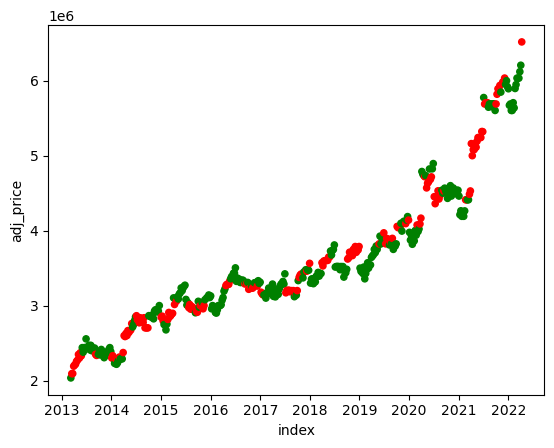

In [91]:
# Trực quan hóa dự đoán
pred_match = (preds == price_data[target].iloc[START:])
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"
import matplotlib.pyplot as plt

plot_data = price_data.iloc[START:].copy()

plot_data.reset_index().plot.scatter(x="index", y="adj_price", color=pred_match)



In [92]:
# Phân tích độ quan trọng của đặc trưng
from sklearn.inspection import permutation_importance

lr = LogisticRegression(random_state=1)
lr.fit(price_data[predictors], price_data[target])

result = permutation_importance(lr, price_data[predictors], price_data[target], n_repeats=10, random_state=1)



In [93]:
# In ra các đặc trưng quan trọng
print("Feature Importances:")
for i, p in enumerate(predictors):
    print(f"{p}: {result.importances_mean[i]}")


Feature Importances:
interest: 0.0
vacancy: 0.0
adj_price: 0.10512465373961215
adj_value: 0.11592797783933513


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

START = 260
STEP = 52

def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split=10, random_state=1)
    rf.fit(train[predictors], train[target])
    preds = rf.predict(test[predictors])
    return preds

def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i+STEP)]
        all_preds.append(predict(train, test, predictors, target))
    
    preds = np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[START:][target], preds)

In [95]:
preds, accuracy = backtest(price_data, predictors, target)


In [96]:
preds


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [97]:
accuracy


0.5692640692640693

In [98]:
yearly = price_data.rolling(52, min_periods=1).mean()


In [99]:
yearly_ratios = [p + "_year" for p in predictors]
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]

In [100]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change,interest_year,vacancy_year,adj_price_year,adj_value_year
2008-02-02,212.174,5.68,10.1,190000.0,206885.853266,1881188.118812,2048374.78481,1950000.0,1,1.000000,1.000000,1.0,1.0
2008-02-09,212.687,5.67,10.1,190000.0,206885.853266,1881188.118812,2048374.78481,1949000.0,1,1.001207,0.999119,1.0,1.0
2008-02-16,212.687,5.72,10.1,193000.0,206885.853266,1910891.089109,2048374.78481,1958710.0,1,1.000805,1.005272,1.010471,1.0
2008-02-23,212.687,6.04,10.1,189900.0,206885.853266,1880198.019802,2048374.78481,1950000.0,1,1.000603,1.045435,0.995674,1.0
2008-03-01,212.687,6.24,10.1,194900.0,205459.521952,1929702.970297,2034252.692591,2000000.0,1,1.000483,1.063032,1.017436,0.994477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-12,287.708,3.85,5.8,350000.0,344042.433111,6034482.758621,5931766.088125,6607142.857143,1,1.047659,1.235955,1.09012,1.118308
2022-03-19,287.708,4.16,5.8,350000.0,344042.433111,6034482.758621,5931766.088125,6696428.571429,1,1.045998,1.326140,1.084009,1.111286
2022-03-26,287.708,4.42,5.8,355000.0,344042.433111,6120689.655172,5931766.088125,6607142.857143,1,1.044342,1.397289,1.093042,1.104353
2022-04-02,287.708,4.67,5.8,360000.0,350515.841789,6206896.551724,6043376.582569,6607142.857143,1,1.042691,1.462275,1.101922,1.117711


In [101]:
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)

In [102]:
accuracy


0.6623376623376623

In [103]:
pred_match = (preds == price_data[target].iloc[START:])
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

<Axes: xlabel='index', ylabel='adj_price'>

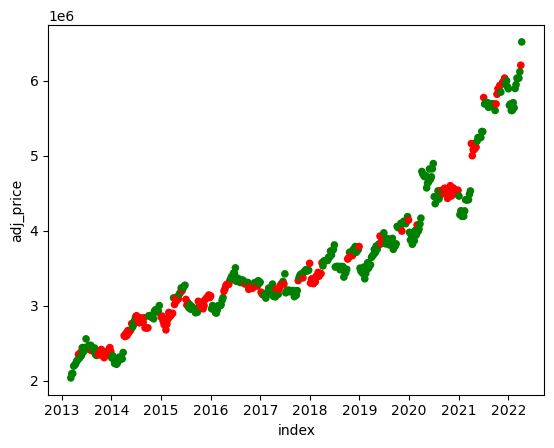

In [104]:
import matplotlib.pyplot as plt

plot_data = price_data.iloc[START:].copy()

plot_data.reset_index().plot.scatter(x="index", y="adj_price", color=pred_match)

In [105]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split=10, random_state=1)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats=10, random_state=1)

In [106]:
result["importances_mean"]

array([0.31592798, 0.15581717, 0.32091413, 0.14127424])

In [107]:
predictors

['interest', 'vacancy', 'adj_price', 'adj_value']